<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/16_2_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 분석
* titanic 데이터는 데이터분석 예제로 많이 사용되며, 실제 타이타닉호에 탑승했던 사람들의 정보를 담고 있습니다
* https://www.kaggle.com/c/titanic/data 에서 데이터를 다운로드할 수도 있으며, 컬럼에 대한 설명이 담겨 있습니다

In [1]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### 생존자가 몇명이었는지 확인해봅시다
* value_counts()를 사용하면 series에 있는 데이터의 개수를 셀수 있습니다 .

In [4]:
alive = titanic['alive'].value_counts()

In [5]:
alive

no     549
yes    342
Name: alive, dtype: int64

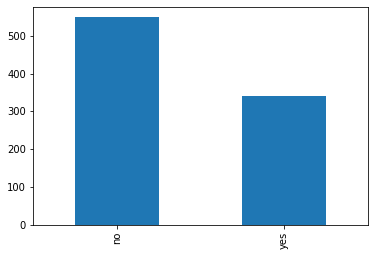

In [6]:
alive.plot.bar()

### 탑승자들의 나이 분포를 살펴봅시다
hist() 함수를 통해서 히스토그램을 그려봅시다. 

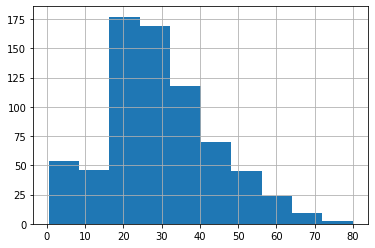

In [7]:
titanic['age'].hist()

### 성별에 따른 생존자수
* pivot_table()함수를 활용하여 필요한 데이터만 정리합니다

In [8]:
alive_sex = pd.pivot_table(titanic, index = 'sex', columns='alive', values='survived', aggfunc='count')

In [9]:
alive_sex

alive,no,yes
sex,,
female,81,233
male,468,109


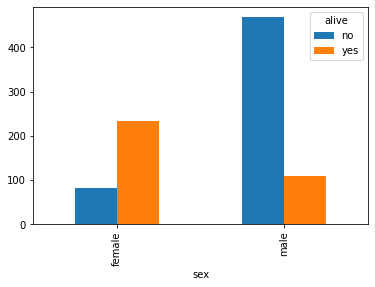

In [10]:
alive_sex.plot.bar()

### 나이대에 따른 생존율 비교
* 연령은 연속된 숫자라서 그래프를 그리려면 구별값을 만들어야 합니다
* cut() 함수를 통해서 값에 따라 특정값을 부여할 수 있습니다

In [11]:
import numpy as np
titanic['age_group'] = pd.cut(titanic['age'], bins = [0,10,20,30,40,50,100], 
                             right = False,
                             labels=['10대 이하', '10대', '20대', '30대', '40대', '50대 이상'])

In [12]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20대
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30대
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20대
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30대
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20대
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10대
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20대


In [13]:
titanic.query('age==20')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,20대
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True,20대
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False,20대
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,20대
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True,20대
404,0,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True,20대
441,0,3,male,20.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,20대
622,1,3,male,20.0,1,1,15.7417,C,Third,man,True,NaN,Cherbourg,yes,False,20대
640,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True,20대
664,1,3,male,20.0,1,0,7.9250,S,Third,man,True,NaN,Southampton,yes,False,20대


In [26]:
alive_age = pd.pivot_table(titanic, index = 'age_group', columns='alive', values='survived', aggfunc='count')

In [27]:
alive_age

alive,no,yes
age_group,,
10대 이하,24,38
10대,61,41
20대,143,77
30대,94,73
40대,55,34
50대 이상,47,27


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


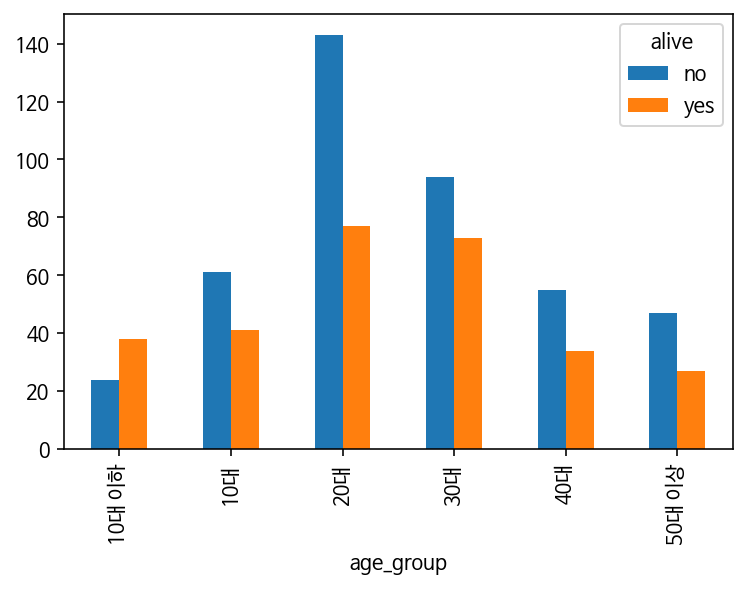

In [28]:
alive_age.plot.bar()

In [29]:
alive_age = alive_age.assign(생존율 = alive_age['yes']/(alive_age.yes+alive_age.no))

In [30]:
alive_age

alive,no,yes,생존율
age_group,,,
10대 이하,24,38,0.612903
10대,61,41,0.401961
20대,143,77,0.350000
30대,94,73,0.437126
40대,55,34,0.382022
50대 이상,47,27,0.364865


In [31]:
alive_age.drop(columns=['no','yes'], inplace=True)

In [32]:
alive_age

alive,생존율
age_group,
10대 이하,0.612903
10대,0.401961
20대,0.350000
30대,0.437126
40대,0.382022
50대 이상,0.364865


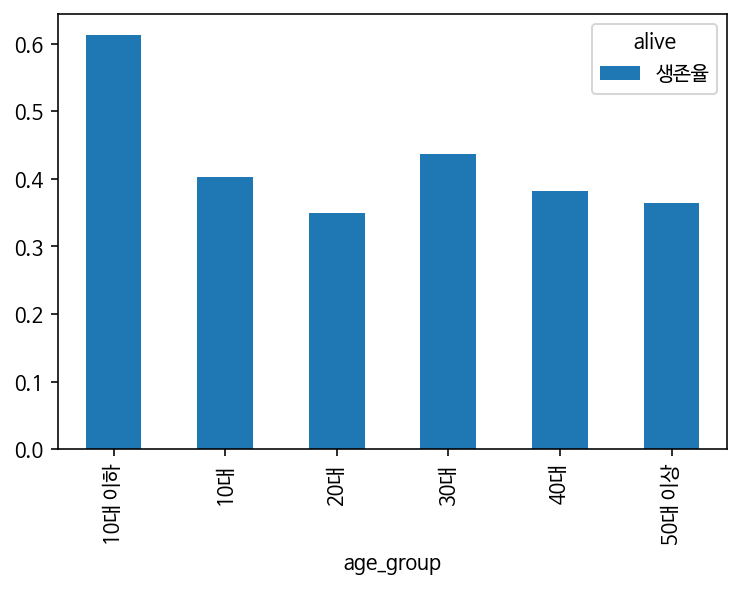

In [33]:
alive_age.plot.bar()